In [28]:
# Utilities
!pip install pydotplus
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve



from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.model_selection import train_test_split, StratifiedKFold,RepeatedStratifiedKFold, cross_val_score, KFold, RandomizedSearchCV,GridSearchCV, RepeatedKFold


from sklearn import tree 
import pydotplus 
from IPython.display import Image

In [29]:
df=pd.read_csv("ravdess_ale.csv")
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,speech,angry,normal,Dogs are sitting by the door,1st,F,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,speech,surprised,normal,Kids are talking by the door,1st,F,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,song,happy,strong,Dogs are sitting by the door,2nd,F,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [30]:
df_copy=df.copy()

cat_var=["vocal_channel","statement","repetition","sex"]
le=preprocessing.LabelEncoder()
for i in cat_var:
    df_copy[i]=le.fit_transform(df_copy[i])
df_copy.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,...,stft_std,stft_min,stft_kur,stft_skew,mean,std,min,max,kur,skew
0,1,fearful,normal,0,1,0,2,3737,16995,-33.485947,...,0.335533,0.0,-1.215025,0.403514,3.844916e-07,0.014482,-0.128632,0.138947,9.406061,0.273153
1,1,angry,normal,0,0,0,2,3904,13906,-29.502108,...,0.352380,0.0,-1.384174,0.290905,-7.149491e-08,0.020417,-0.305725,0.263062,19.564187,0.292157
2,0,happy,strong,0,1,0,2,4671,18723,-30.532463,...,0.352270,0.0,-1.242947,0.470350,2.429985e-06,0.024317,-0.137482,0.166351,4.881241,0.302659
3,1,surprised,normal,1,0,0,2,3637,11617,-36.059555,...,0.360552,0.0,-1.445318,0.274756,2.373929e-07,0.003561,-0.027374,0.024078,13.040259,-0.081014
4,0,happy,strong,0,1,0,2,4404,15137,-31.405996,...,0.350655,0.0,-1.366742,0.318926,8.454691e-07,0.027522,-0.192169,0.242676,7.485109,0.414872


In [31]:
# one-hot encoding of categorical feature "emotion"
categorical_col = ["emotion"]

df_copy = pd.get_dummies(df_copy, columns=categorical_col)
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,normal,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,normal,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,strong,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,normal,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,strong,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [32]:
le=preprocessing.LabelEncoder()
df_copy["emotional_intensity"]=le.fit_transform(df_copy["emotional_intensity"])
df_copy.head()

,vocal_channel,emotional_intensity,statement,repetition,sex,frame_width,length_ms,zero_crossings_sum,mfcc_mean,mfcc_std,...,kur,skew,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised
0,1,0,0,1,0,2,3737,16995,-33.485947,134.654860,...,9.406061,0.273153,0,0,0,1,0,0,0,0
1,1,0,0,0,0,2,3904,13906,-29.502108,130.485630,...,19.564187,0.292157,1,0,0,0,0,0,0,0
2,0,1,0,1,0,2,4671,18723,-30.532463,126.577110,...,4.881241,0.302659,0,0,0,0,1,0,0,0
3,1,0,1,0,0,2,3637,11617,-36.059555,159.725160,...,13.040259,-0.081014,0,0,0,0,0,0,0,1
4,0,1,0,1,0,2,4404,15137,-31.405996,122.125824,...,7.485109,0.414872,0,0,0,0,1,0,0,0


In [33]:
# Print confusion matrix
def print_confMatrix(y_test,y_test_pred):
    cm=confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Greens")
    plt.show()

In [34]:
# Print Roc Curve 
def print_rocCurve(clf,X_test,y_test):
    y_tmp=clf.predict_proba(X_test)
    plot_roc(y_test, clf.predict_proba(X_test),figsize=(10,6))
    plt.show()
    #print(roc_auc_score(y_test, y_tmp))
    #print(roc_auc_score(y_test, y_tmp[:,1]))

In [35]:
# Print Precision-Recall Curve
def print_precrecCurve(clf,X_test,y_test):
    plot_precision_recall(y_test, clf.predict_proba(X_test),figsize=(10,7))
    plt.show()

In [36]:
def cumulativeGain_AND_Lift_Curve(clf,X_test,y_test):
    fig, axs = plt.subplots(2, 1, sharex=True, figsize=(8,6))
    plot_cumulative_gain(y_test, clf.predict_proba(X_test), ax=axs[0],figsize=(10,7))
    plot_lift_curve(y_test, clf.predict_proba(X_test), ax=axs[1],figsize=(10,7))
    plt.tight_layout()
    plt.show()  

In [37]:
#Print Decision Tree

def print_DecisionTree(dt):
    plt.figure(figsize=(20, 4), dpi=300)
    plot_tree(dt, feature_names=df_copy.columns, filled=True)
    plt.show() 

In [38]:
# Funzione per fare la GridSearch()
def customGridSearch(X_train, y_train, model, tuned_parameters,score):

    print("____________________________________________ START GRID SEARCH ____________________________________________")

    results = {}
    for s in score: 
        print("------- Score = " + str(s) +  "------- \n")
            
        k_fold = RepeatedKFold() # 5 split default, 10 repetitions default
        print("> Fold = " + str(k_fold) + "\n")
            
        clf = GridSearchCV(model, tuned_parameters, error_score='raise', cv=k_fold, scoring = s, return_train_score=True)
        clf.fit(X_train, y_train)

        print("> Best Parameter set: \n")
        best = clf.best_params_
        print(best)
        print("\n> Grid scores(validation):\n")
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        parameters = {"criterion": [], "max_depth": [], "min_samples_leaf": [], "min_samples_split": []}
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
            parameters["criterion"].append(params["criterion"])

            if(params["max_depth"] == None):
                parameters["max_depth"].append(0)
            else:
                parameters["max_depth"].append(params["max_depth"])

            #parameters["max_depth"].append(params["max_depth"])
            parameters["min_samples_leaf"].append(params["min_samples_leaf"])
            parameters["min_samples_split"].append(params["min_samples_split"])
            
        print("\n> Grid scores(training):\n")

        means = clf.cv_results_['mean_train_score']
        stds = clf.cv_results_['std_train_score']

        print("...........RESULTS FOR TRAINING.........")
        print("........................................")

    
        
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
                            
        print("____________________________________________ END GRID SEARCH ____________________________________________")
            
        results[s] = best
    
    return results

In [39]:
col=[x for x in df_copy.columns if x!="vocal_channel"]
X=df_copy[col].values
y = np.array(df_copy["vocal_channel"])


#holdout -> emotional intensity bilanciato quindi no stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [40]:


scores = ["recall", "f1", "roc_auc"]
check_params = {'max_depth': [None, 2, 5, 10, 15, 20],
                'min_samples_split': [2, 5, 10, 15, 20],
                'min_samples_leaf': [1, 5, 10, 15, 20],
                "criterion": ["gini", "entropy"] 
                }

clf = DecisionTreeClassifier()
results = customGridSearch(X_train, y_train, clf, check_params, scores)

____________________________________________ START GRID SEARCH ____________________________________________
------- Score = recall------- 

> Fold = RepeatedKFold(n_repeats=10, n_splits=5, random_state=None)

> Best Parameter set: 

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 15, 'min_samples_split': 10}

> Grid scores(validation):

0.942 (+/-0.034) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.940 (+/-0.043) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.939 (+/-0.038) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.942 (+/-0.040) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 15}
0.944 (+/-0.042) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.948 (+/-0.038) for {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_spli

In [43]:
learner = DecisionTreeClassifier(criterion="gini", max_depth=10, min_samples_leaf=10, min_samples_split=15)
classifier = learner.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       296
           1       0.93      0.95      0.94       440

    accuracy                           0.93       736
   macro avg       0.93      0.92      0.92       736
weighted avg       0.93      0.93      0.93       736



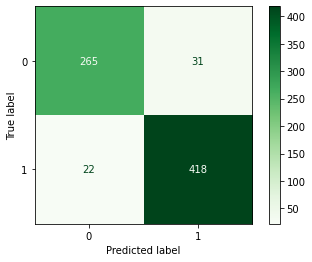

In [44]:
print_confMatrix(y_test,predictions)

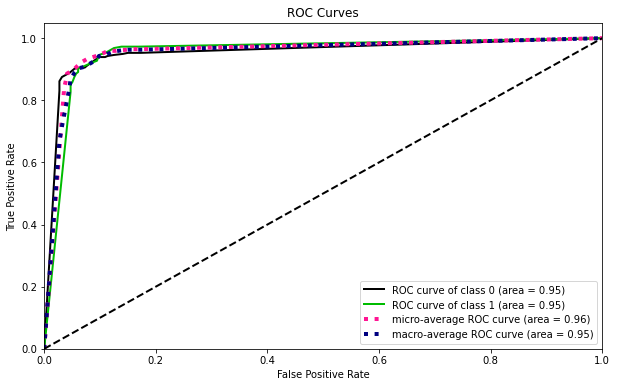

In [45]:
print_rocCurve(learner,X_test,y_test)

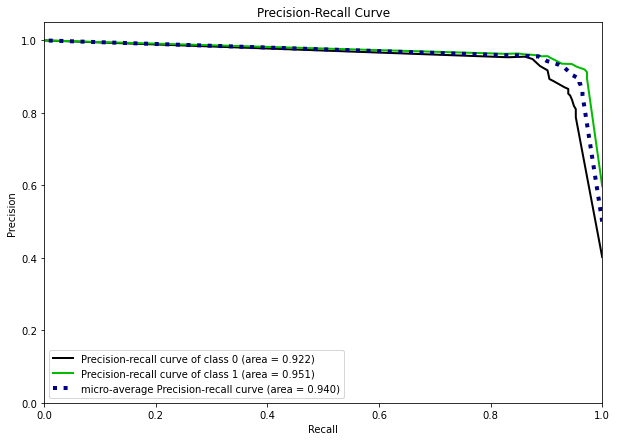

In [46]:
print_precrecCurve(learner,X_test,y_test)

emotional_intensity 0.0
statement 0.0
repetition 0.0
sex 0.0
frame_width 0.0
mfcc_std 0.0
mfcc_min 0.0
sc_min 0.0
sc_kur 0.0
sc_skew 0.0
mean 0.0
std 0.0
emotion_angry 0.0
emotion_calm 0.0
emotion_happy 0.0
emotion_neutral 0.0
emotion_sad 0.0
emotion_surprised 0.0
skew 0.00014255877295910326
mfcc_mean 0.0005198554412118399
min 0.00067746539566797
emotion_fearful 0.0014099893270350984
sc_std 0.0014767121638201402
stft_kur 0.0024004253897744205
sc_max 0.0030816691903953696
stft_mean 0.003592619522481646
zero_crossings_sum 0.003985762647160006
mfcc_max 0.0049959588026213895
stft_min 0.0060184053539008775
stft_std 0.007503907470301529
kur 0.014468246559751615
sc_mean 0.025252870169346943
max 0.02783278438387176
stft_skew 0.03866183899212794
emotion_disgust 0.059698472521499436
length_ms 0.798280457896073


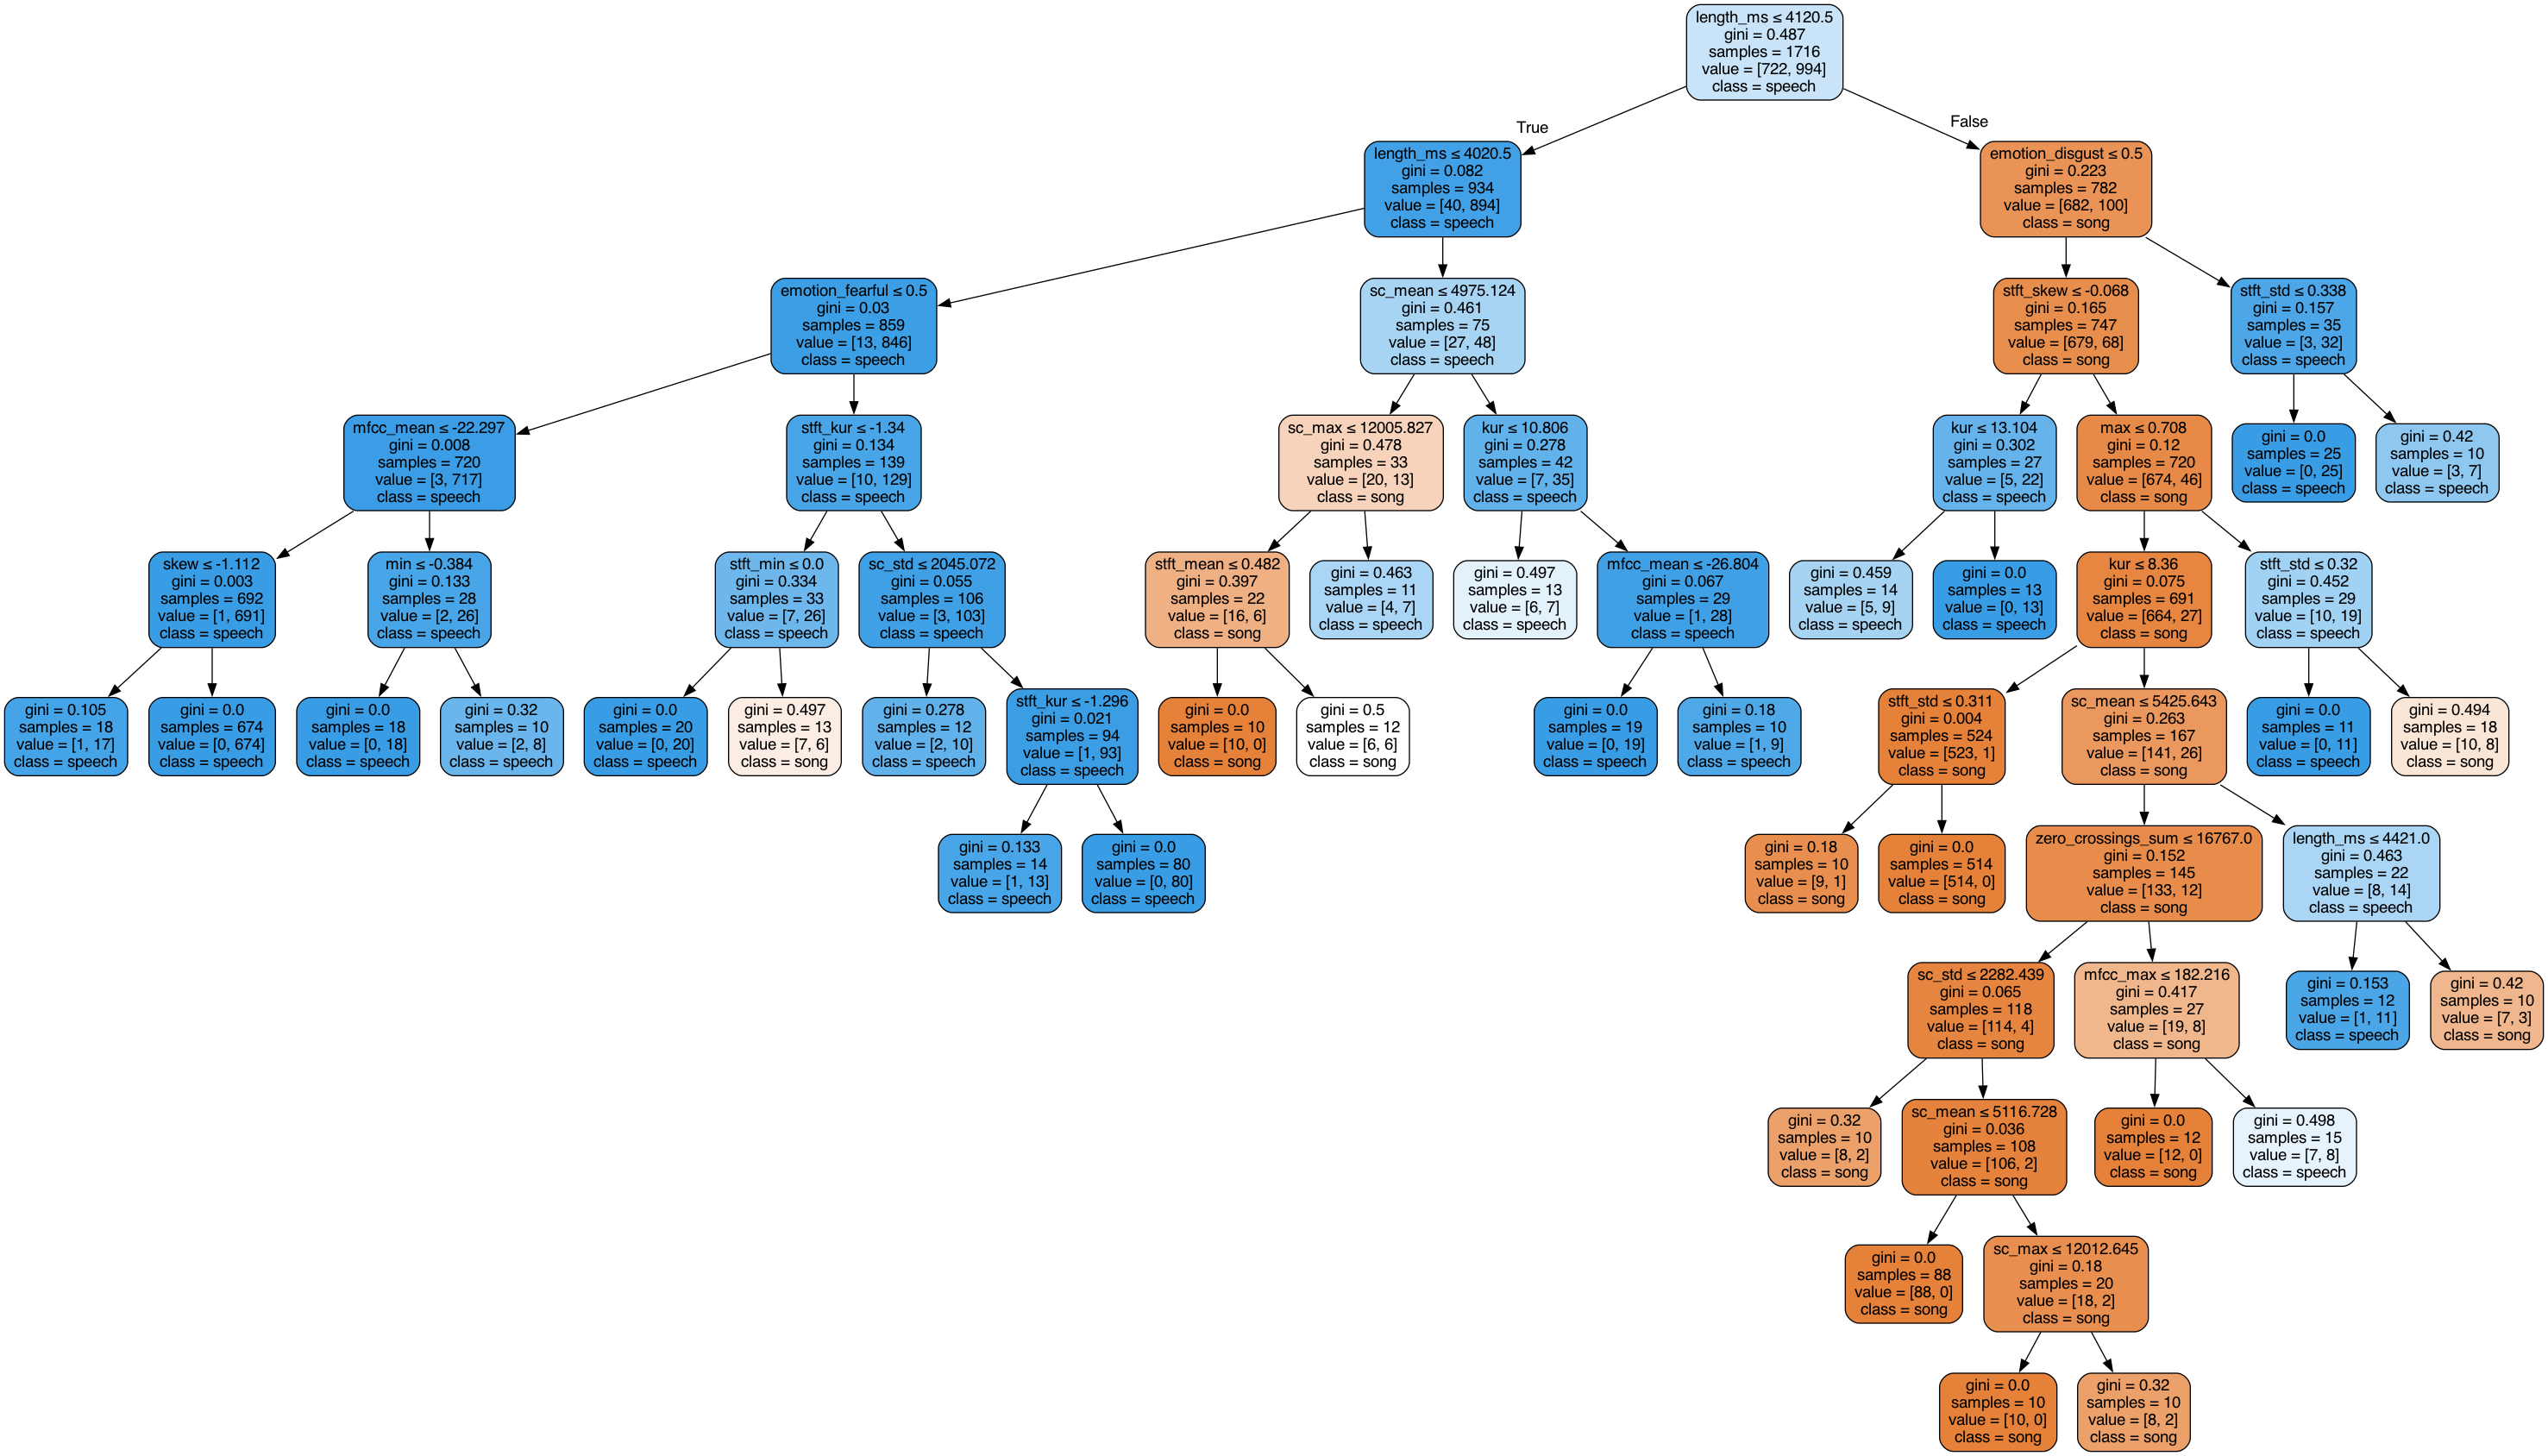

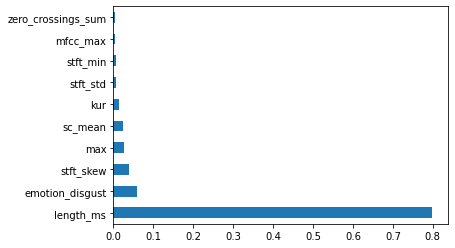

In [47]:
clf = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_leaf = 10, min_samples_split = 15)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

zipped = zip(col, clf.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1])

for i, imp in zipped:
    print(i, imp)

feat_importances = pd.Series(clf.feature_importances_, index=col)
feat_importances.nlargest(10).plot(kind='barh')

dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=col,
                                class_names=['speech' if x == 1 else 'song' for x in clf.classes_],  
                                filled=True, rounded=True,  
                                special_characters=True,
                                max_depth=15)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())